# Analyzing Training, Validation, and Testing Sets

Investigation of the dataset for new reflector short tank data

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Add the path to the parent directory to augment search for module

if "../../.." not in sys.path:
    print("adding pardir")
    sys.path.append("../../..")

from WatChMaL_analysis.short_tank_EDA.old_reflector_short_tank_exploratory_data_analysis.exploratory_data_analysis_utils import *

adding pardir


# Load Data From H5

In [4]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


In [5]:
events_hit_index = data_file['event_hits_index']

In [6]:
print(type(events_hit_index))

<class 'h5py._hl.dataset.Dataset'>


In [10]:
print(events_hit_index.shape)

(20613195,)


In [11]:
print(len(events_hit_index))

20613195


In [12]:
print(hit_charge.shape)

(26925826390,)


In [13]:
print(len(hit_charge))

26925826390


In [14]:
print(events_hit_index[-1])

26925825772


In [15]:
print(len(hit_charge) - events_hit_index[-1])

618


In [8]:
idxs = list(range(500, 1000))

In [9]:
print(events_hit_index[idxs])

[ 642659  642955  644235  645630  646023  646907  649581  651070  654882
  656202  657402  658025  658962  661492  664337  665894  667611  670042
  671433  673863  675690  677818  679117  680290  681393  681821  682302
  682828  684761  686211  686665  689057  689130  692960  693377  694843
  695065  695427  696792  697242  698818  699191  701878  702424  703183
  706052  706168  706749  707764  708075  708880  709490  711438  713008
  714867  715500  717672  717929  719524  720252  722152  722868  723634
  724712  725318  726253  728312  730960  731024  732541  734332  736192
  736660  738290  738823  738921  740202  740621  742042  743106  743390
  743770  745128  746982  747456  747741  747930  750065  750862  751104
  751939  755071  755297  755698  757235  757343  757402  759461  761349
  762508  763875  764484  765034  765309  765910  768507  770191  770259
  770440  770974  772779  773658  773777  775277  776152  778402  778762
  778867  779347  781776  783298  783930  784174  7

In [16]:
labels

0

# Load Indices

In [7]:
idxs_path = '../../short_tank_EDA/new_reflector_short_tank_exploratory_data_analysis/short_dataset_data/IWCD_mPMT_Short_3M_OD_veto_idxs.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

# Split Datasets

In [8]:
train_angles    = angles[train_idxs]
train_energies  = energies[train_idxs]
train_positions = positions[train_idxs]
train_labels    = labels[train_idxs]

train_info = {'name':'Training Set','energies':train_energies,'positions':train_positions, 'angles':train_angles, 'labels':train_labels}

print("Done train info")

val_angles     = angles[val_idxs]
val_energies   = energies[val_idxs]
val_positions  = positions[val_idxs]
val_labels     = labels[val_idxs]

val_info = {'name':'Validation Set','energies':val_energies,'positions':val_positions, 'angles':val_angles, 'labels':val_labels}

print("Done val info")

test_angles    = angles[test_idxs]
test_energies  = energies[test_idxs]
test_positions = positions[test_idxs]
test_labels    = labels[test_idxs]
test_info = {'name':'Test Set','energies':test_energies,'positions':test_positions, 'angles':test_angles, 'labels':test_labels}

print("Done test info")

Done train info
Done val info
Done test info


In [11]:
# compute and save event radii
"""
train_radius    = [np.sqrt(train_positions[i,0,0]**2 + train_positions[i,0,2]**2) for i in range(train_positions.shape[0])]
val_radius     = [np.sqrt(val_positions[i,0,0]**2 + val_positions[i,0,2]**2) for i in range(val_positions.shape[0])]
test_radius    = [np.sqrt(test_positions[i,0,0]**2 + test_positions[i,0,2]**2) for i in range(test_positions.shape[0])]

np.savez('./filtered_indices_data/event_radii.npz', train_radii=train_radius, val_radii=val_radius, test_radii=test_radius)
"""

In [12]:
radii_data = np.load('./filtered_indices_data/event_radii.npz', allow_pickle=True)

train_info['radius'] = radii_data['train_radii']
val_info['radius']   = radii_data['val_radii']
test_info['radius']  = radii_data['test_radii']

In [13]:
dataset_info = [train_info, val_info, test_info]

# Get indices associated with each dataset and particle type

In [14]:

train_g_idxs = np.where(dataset_info[0]['labels']==0)[0]
val_g_idxs   = np.where(dataset_info[1]['labels']==0)[0]
test_g_idxs  = np.where(dataset_info[2]['labels']==0)[0]

train_e_idxs = np.where(dataset_info[0]['labels']==1)[0]
val_e_idxs   = np.where(dataset_info[1]['labels']==1)[0]
test_e_idxs  = np.where(dataset_info[2]['labels']==1)[0]

train_m_idxs = np.where(dataset_info[0]['labels']==2)[0]
val_m_idxs   = np.where(dataset_info[1]['labels']==2)[0]
test_m_idxs  = np.where(dataset_info[2]['labels']==2)[0]

# Distribution of event energies by dataset and particle type

In [15]:
# get energies
train_e_energies = dataset_info[0]['energies'][train_e_idxs]
val_e_energies   = dataset_info[1]['energies'][val_e_idxs]
test_e_energies  = dataset_info[2]['energies'][test_e_idxs]

e_energies = np.concatenate((train_e_energies, val_e_energies, test_e_energies))

train_g_energies = dataset_info[0]['energies'][train_g_idxs]
val_g_energies   = dataset_info[1]['energies'][val_g_idxs]
test_g_energies  = dataset_info[2]['energies'][test_g_idxs]

g_energies = np.concatenate((train_g_energies, val_g_energies, test_g_energies))

train_m_energies = dataset_info[0]['energies'][train_m_idxs]
val_m_energies   = dataset_info[1]['energies'][val_m_idxs]
test_m_energies  = dataset_info[2]['energies'][test_m_idxs]


m_energies = np.concatenate((train_m_energies, val_m_energies, test_m_energies))

../../../WatChMaL_analysis/short_tank_EDA/old_reflector_short_tank_exploratory_data_analysis/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
../../../WatChMaL_analysis/short_tank_EDA/old_reflector_short_tank_exploratory_data_analysis/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
../../../WatChMaL_analysis/short_tank_EDA/old_reflector_short_tank_exploratory_data_analysis/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
../../../WatChMaL_analysis/short_tank_EDA/old_reflector_short_tank_exploratory_data_analysis/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
../../../WatChMaL_analysis/short_tank_EDA/old_reflector_short_tank_explo

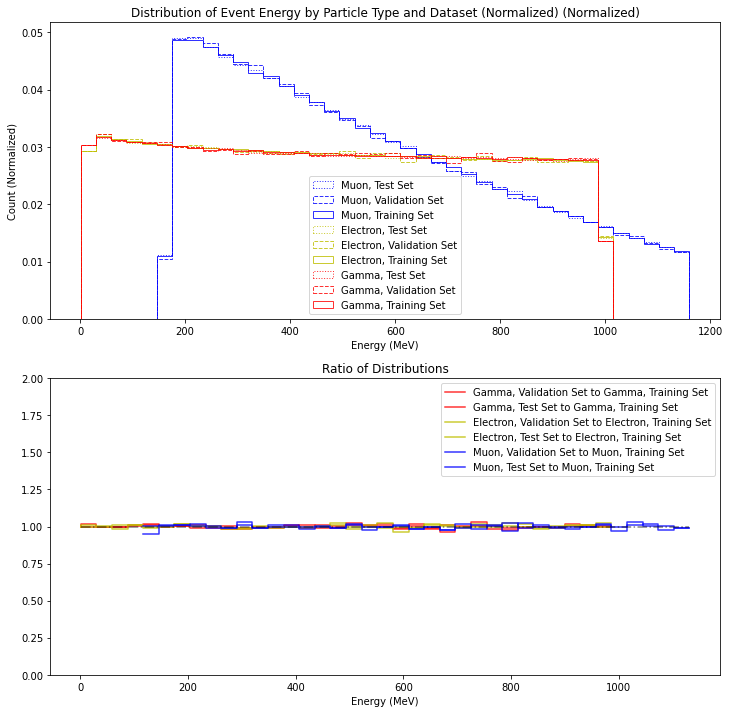

In [16]:
fig = plot_compare_dists([np.squeeze(train_e_energies), np.squeeze(val_e_energies), np.squeeze(test_e_energies), 
                          np.squeeze(train_g_energies), np.squeeze(val_g_energies), np.squeeze(test_g_energies),  
                          np.squeeze(train_m_energies), np.squeeze(val_m_energies), np.squeeze(test_m_energies)],
                         numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                         denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                         bins=40,
                         labels=[
                                  'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                  'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                  'Muon, Training Set', 'Muon, Validation Set', 'Muon, Test Set'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                         colors =  ['r','r','r','y','y','y','b','b','b'],
                         linestyle=['-','--',':','-','--',':','-','--',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center'
                    )

# Distribution of event energies by dataset and particle type relative to threshold

In [17]:
GAMMA_THRESHOLD = 1.55
ELECTRON_THRESHOLD = 0.775
MUON_THRESHOLD = 160.26

In [18]:
shifted_energies = []
for idx in range(3):
    shifted_energies.append(np.zeros(dataset_info[idx]['labels'].shape[0]))
    
    g_idxs = np.where(dataset_info[idx]['labels']==0)[0]
    e_idxs = np.where(dataset_info[idx]['labels']==1)[0]
    m_idxs = np.where(dataset_info[idx]['labels']==2)[0]
    
    shifted_energies[idx][g_idxs] = np.squeeze(dataset_info[idx]['energies'][g_idxs] - GAMMA_THRESHOLD)
    shifted_energies[idx][e_idxs] = np.squeeze(dataset_info[idx]['energies'][e_idxs] - ELECTRON_THRESHOLD)
    shifted_energies[idx][m_idxs] = np.squeeze(dataset_info[idx]['energies'][m_idxs] - MUON_THRESHOLD)

In [19]:
# get shifted energies
shifted_train_g_energies = shifted_energies[0][train_g_idxs]
shifted_val_g_energies   = shifted_energies[1][val_g_idxs]
shifted_test_g_energies  = shifted_energies[2][test_g_idxs]

shifted_g_energies = np.concatenate((shifted_train_g_energies, shifted_val_g_energies, shifted_test_g_energies))

shifted_train_e_energies = shifted_energies[0][train_e_idxs]
shifted_val_e_energies   = shifted_energies[1][val_e_idxs]
shifted_test_e_energies  = shifted_energies[2][test_e_idxs]

shifted_e_energies = np.concatenate((shifted_train_e_energies, shifted_val_e_energies, shifted_test_e_energies))

shifted_train_m_energies = shifted_energies[0][train_m_idxs]
shifted_val_m_energies   = shifted_energies[1][val_m_idxs]
shifted_test_m_energies  = shifted_energies[2][test_m_idxs]

shifted_m_energies = np.concatenate((shifted_train_m_energies, shifted_val_m_energies, shifted_test_m_energies))


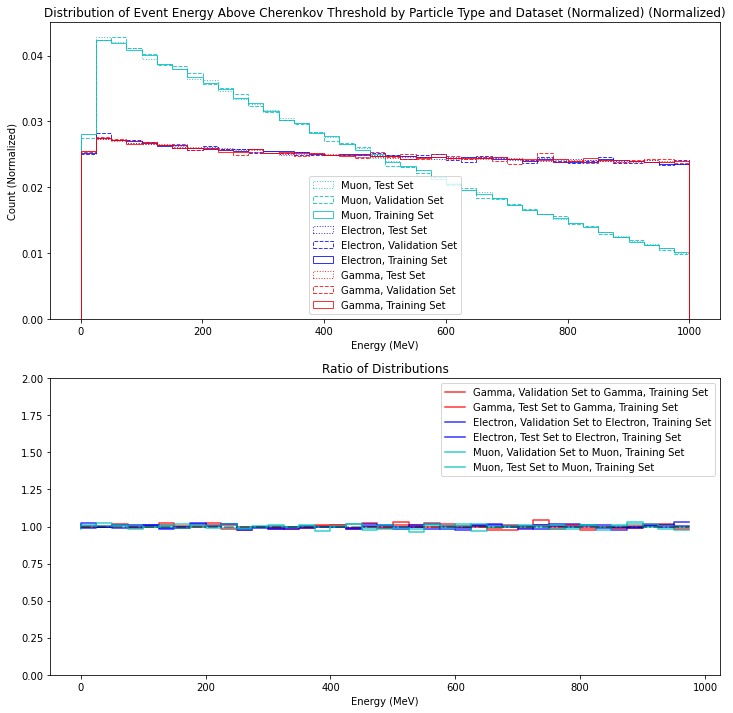

In [20]:
fig = plot_compare_dists([np.squeeze(shifted_train_e_energies), np.squeeze(shifted_val_e_energies), np.squeeze(shifted_test_e_energies), 
                          np.squeeze(shifted_train_g_energies), np.squeeze(shifted_val_g_energies), np.squeeze(shifted_test_g_energies),  
                          np.squeeze(shifted_train_m_energies), np.squeeze(shifted_val_m_energies), np.squeeze(shifted_test_m_energies)],
                          numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                          denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                          bins=40,
                          labels=[
                                 'Gamma, Training Set', 'Gamma, Validation Set', 'Gamma, Test Set',
                                 'Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                 'Muon, Training Set', 'Muon, Validation Set', 'Muon, Test Set'],
                          ratio_range=[0,2],
                          title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset (Normalized)', colors=['r','r','r','b','b','b','c','c','c'],
                          linestyle=['-','--',':','-','--',':','-','--',':'], xlabel='Energy (MeV)',
                          loc='lower center'
                    )

# Distribution of event departure angles

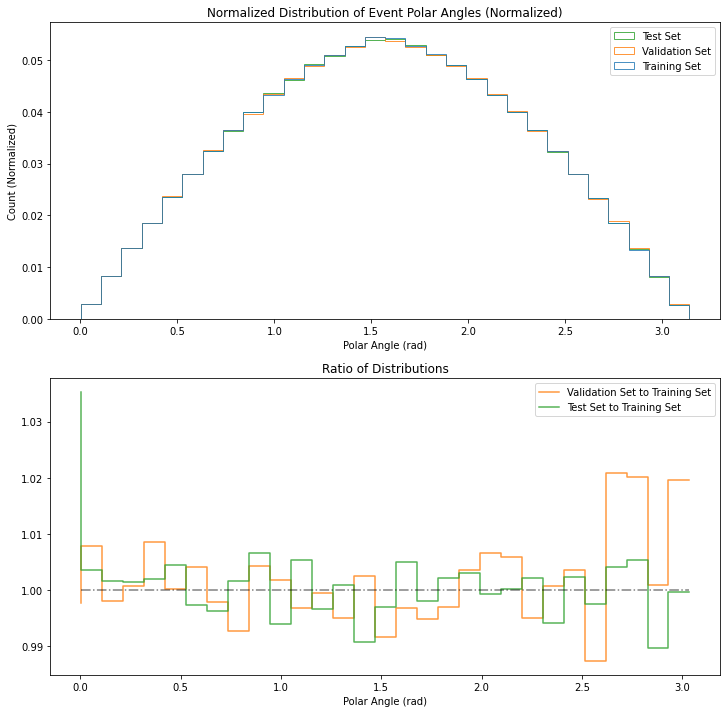

In [21]:
fig = plot_compare_dists(([data['angles'][:,0] for data in dataset_info]),[1,2],[0,0],[data['name'] for data in dataset_info],
                    bins=30,title='Normalized Distribution of Event Polar Angles',xlabel='Polar Angle (rad)')

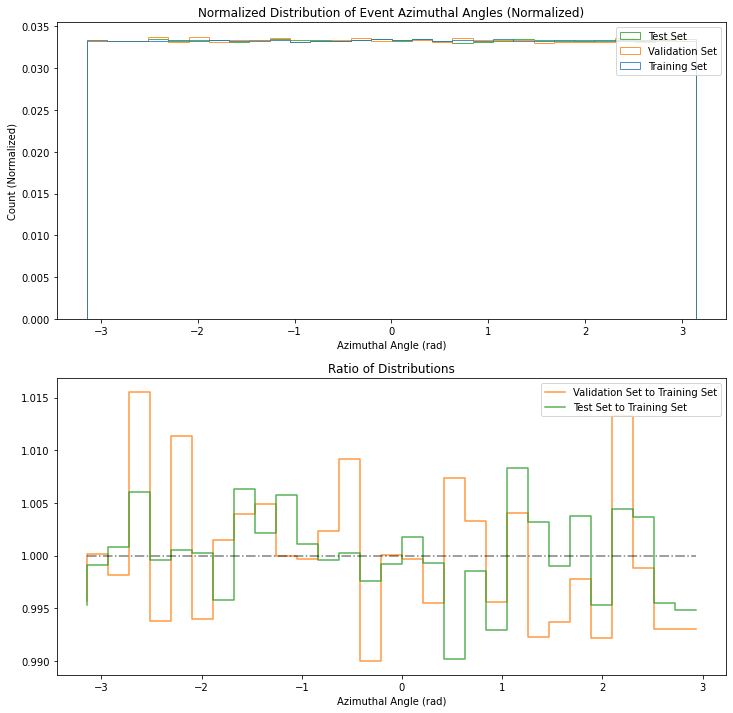

In [22]:
fig = plot_compare_dists(([data['angles'][:,1] for data in dataset_info]),[1,2],[0,0],[data['name'] for data in dataset_info],
                    bins=30,title='Normalized Distribution of Event Azimuthal Angles', xlabel='Azimuthal Angle (rad)')


<Figure size 432x288 with 0 Axes>

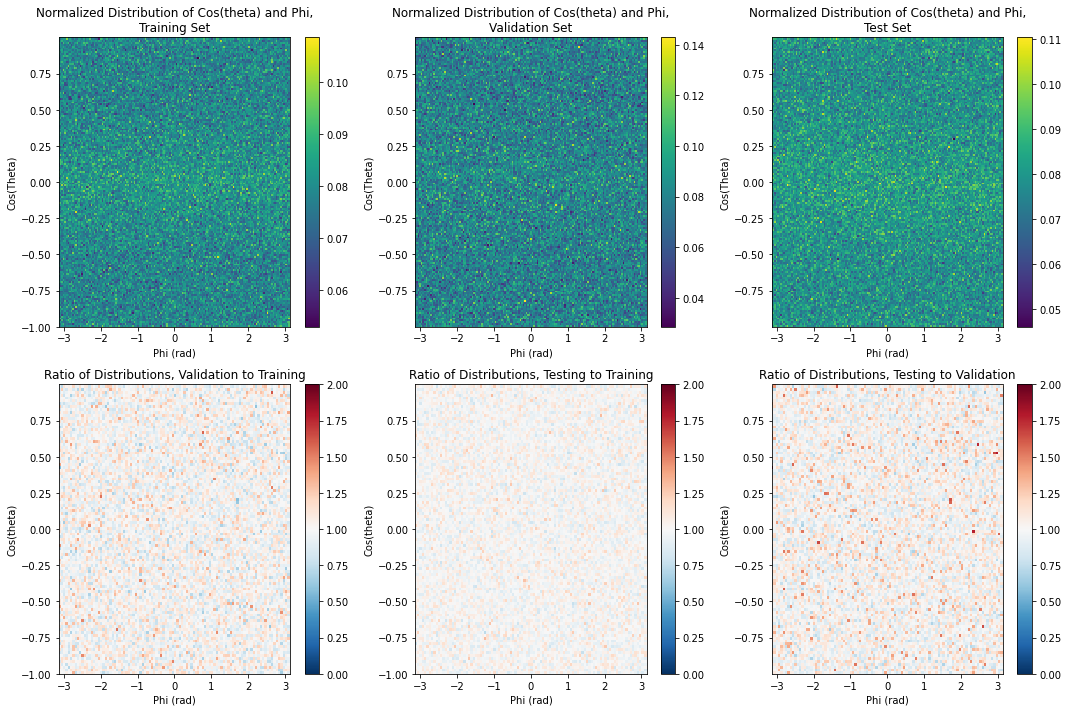

In [23]:
plt.figure()
fig,axes = plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()

for idx in range(3):
    ax = axes[idx]
    mat,_,_,im = ax.hist2d(dataset_info[idx]['angles'][:,1], np.cos(dataset_info[idx]['angles'][:,0]),[150,150],density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Cos(theta) and Phi,\n{}'.format(dataset_info[idx]['name']))
    ax.set_ylabel('Cos(Theta)')
    ax.set_xlabel('Phi (rad)')

fig = plot_2d_ratio(dataset_info[1]['angles'][:,1], np.cos(dataset_info[1]['angles'][:,0]),
                      dataset_info[0]['angles'][:,1], np.cos(dataset_info[0]['angles'][:,0]),bins=(100,100),
                      title='Ratio of Distributions, Validation to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                      fig=fig, ax=axes[3],ratio_range=[0,2])
fig = plot_2d_ratio(dataset_info[2]['angles'][:,1], np.cos(dataset_info[2]['angles'][:,0]),
                      dataset_info[0]['angles'][:,1], np.cos(dataset_info[0]['angles'][:,0]),bins=(100,100),
                      title='Ratio of Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                      fig=fig, ax=axes[4],ratio_range=[0,2])
fig = plot_2d_ratio(dataset_info[2]['angles'][:,1], np.cos(dataset_info[2]['angles'][:,0]),
                      dataset_info[1]['angles'][:,1], np.cos(dataset_info[1]['angles'][:,0]),bins=(100,100),
                      title='Ratio of Distributions, Testing to Validation',ylabel='Cos(theta)',xlabel='Phi (rad)',
                      fig=fig, ax=axes[5],ratio_range=[0,2])

plt.tight_layout()
plt.show()

# Distribution of events throughout the detector volume

<Figure size 432x288 with 0 Axes>

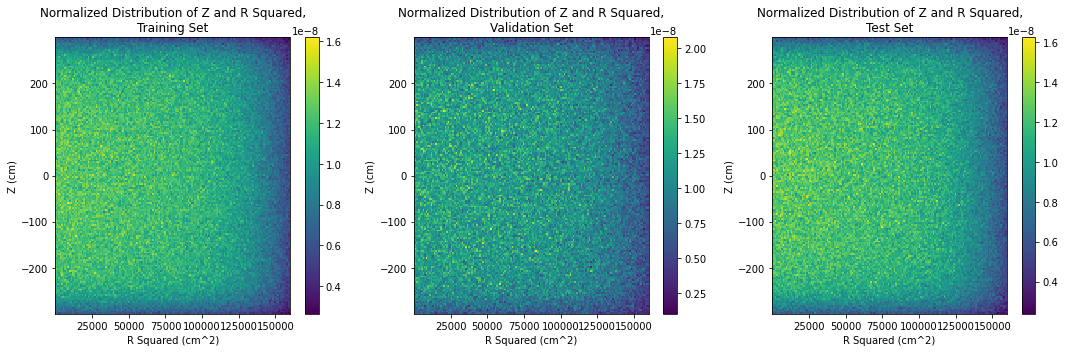

In [24]:
plt.figure()
fig,axes = plt.subplots(1,3,figsize=(15,5))

bins=(150,150)
for idx,ax in enumerate(axes):
    mat,_,_,im = ax.hist2d(list(map(lambda x : x**2,dataset_info[idx]['radius'])), 
                           dataset_info[idx]['positions'][:,0,1],bins,density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Z and R Squared,\n{}'.format(dataset_info[idx]['name']))
    ax.set_ylabel('Z (cm)')
    ax.set_xlabel('R Squared (cm^2)')
    
plt.tight_layout()
plt.show()

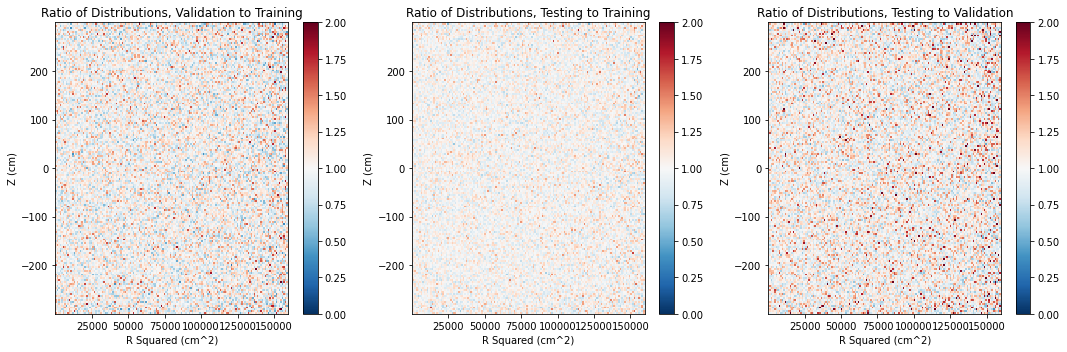

In [25]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

bins=(150,150)
fig = plot_2d_ratio(list(map(lambda x : x**2,dataset_info[1]['radius'])), dataset_info[1]['positions'][:,0,1],
                      list(map(lambda x : x**2,dataset_info[0]['radius'])), dataset_info[0]['positions'][:,0,1],
                      bins=bins,
                      title='Ratio of Distributions, Validation to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                      fig=fig, ax=axes[0],ratio_range=[0,2])

fig = plot_2d_ratio(list(map(lambda x : x**2,dataset_info[2]['radius'])), dataset_info[2]['positions'][:,0,1],
                      list(map(lambda x : x**2,dataset_info[0]['radius'])), dataset_info[0]['positions'][:,0,1],
                      bins=bins,
                      title='Ratio of Distributions, Testing to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                      fig=fig, ax=axes[1],ratio_range=[0,2])

fig = plot_2d_ratio(list(map(lambda x : x**2,dataset_info[2]['radius'])), dataset_info[2]['positions'][:,0,1],
                      list(map(lambda x : x**2,dataset_info[1]['radius'])), dataset_info[1]['positions'][:,0,1],bins=bins,
                      title='Ratio of Distributions, Testing to Validation',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                      fig=fig, ax=axes[2],ratio_range=[0,2])

plt.tight_layout()